# Connect to drive and unzip data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile('/content/drive/MyDrive/data.zip', 'r') as zip:
    zip.extractall()

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image, ImageDraw
import copy

# ****loading the data and make them sorted in right order****

In [ ]:
import glob
img_dir_name = '/content/train/images/'
list_of_files = sorted( filter( os.path.isfile,glob.glob(img_dir_name + '*') ) )
Classes=[]
images_data_paths = []
for file_path in list_of_files:
    if os.path.splitext((file_path.split('/'))[4])[0] == 'train':
        continue
    images_data_paths.append(file_path)


label_dir_name = '/content/train/labels/'
list_of_files = sorted( filter( os.path.isfile,glob.glob(label_dir_name + '*') ) )

labels_data_paths = []
for file_path in list_of_files:
    if os.path.splitext((file_path.split('/'))[4])[0] == 'classes':
        file = open(file_path, 'r')
        # Read the contents of the file
        Classes=(file.read().split("\n"))
        continue
    labels_data_paths.append(file_path)
print(len(labels_data_paths))
print(len(images_data_paths))

8218
8218


# Data visualization

In [ ]:
Classes

['auto', 'bus', 'car', 'lcv', 'motorcycle', 'multiaxle', 'tractor', 'truck']

In [ ]:
def extraxt_labelPaths(paths):
    Label_list=[]
    for path in paths:
      file = open(path, 'r')
      list=file.read().split("\n")
      list.pop(-1)
      list2=[]
      for item in list:
        list2.append([float(num) for num in item.split(" ")])
      Label_list.append(list2)
    return Label_list
# i store labels in Labels_Data
Labels_Data =extraxt_labelPaths(labels_data_paths)

**This part to show data in panda form**

In [ ]:
data_show =[]
indx=0
for label in Labels_Data:
  for item in label:
    string_array = [str(num) for num in item]
    string_array[0] = Classes[int(item[0])]
    data_show.append([os.path.splitext((labels_data_paths[indx].split('/'))[4])[0]]+string_array)
  indx=indx+1

In [ ]:
df = pd.DataFrame(np.array(data_show), columns=['Name_image','Label', 'X_center', 'Y_center','Width','Height'])
df


,Name_image,Label,X_center,Y_center,Width,Height
0,Highway_0_2020-07-30_jpg.rf.09e9d4467f17b2b870...,lcv,0.509804,0.411765,0.107843,0.245098
1,Highway_0_2020-07-30_jpg.rf.09e9d4467f17b2b870...,car,0.210784,0.616422,0.127451,0.232843
2,Highway_0_2020-07-30_jpg.rf.7d947cc31b302b22a5...,auto,0.50375,0.405,0.0975,0.245
3,Highway_0_2020-07-30_jpg.rf.7d947cc31b302b22a5...,bus,0.19,0.59875,0.12,0.2325
4,Highway_0_2020-07-30_jpg.rf.7d947cc31b302b22a5...,car,0.62125,0.61,0.0575,0.125
...,...,...,...,...,...,...
26093,ulu999_jpg.rf.81c9df96bc39c06bd302b0bdc729863b,motorcycle,0.691106,0.560096,0.079327,0.230769
26094,ulu9_jpg.rf.d3dcd2359c5b8697fc5b60b95b7c70d9,car,0.519231,0.328125,0.052885,0.112981
26095,ulu9_jpg.rf.d3dcd2359c5b8697fc5b60b95b7c70d9,truck,0.515625,0.157452,0.036058,0.079327
26096,ulu9_jpg.rf.d3dcd2359c5b8697fc5b60b95b7c70d9,car,0.539663,0.578125,0.084135,0.209135


In [ ]:
del(df)
del(data_show)
del(labels_data_paths)

# Get True Labels in format 7x7x13

In [ ]:
import math

**This method get lable in form 7x7x13 format the 13 column represent PC,x,y,w,h and 8 places for hot vector of label**

In [ ]:
def get_true_label(Label_list):
  Ground_Truth_label=[]
  for lable in Label_list:
      true_labels=np.zeros((7,7,13))
      for item in lable:
        arrElem =item
        dx=float(arrElem[1])
        dy=float(arrElem[2])
        x_box =(dx*7-math.floor(dx*7.0))
        y_box =(dy*7-math.floor(dy*7.0))
        class_vector =np.zeros(8)
        class_vector[int(arrElem[0])]=1
        first_5_entry =np.array([1,x_box,y_box,float(arrElem[3])*7.0,float(arrElem[4])*7.0])
        true_labels[math.floor(dx*7.0)][math.floor(dy*7.0)][0:20]=np.concatenate((first_5_entry,class_vector)).tolist()
      Ground_Truth_label.append(true_labels)
  return np.array(Ground_Truth_label)



# Visualize the bounding boxes of some images

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt

416 416


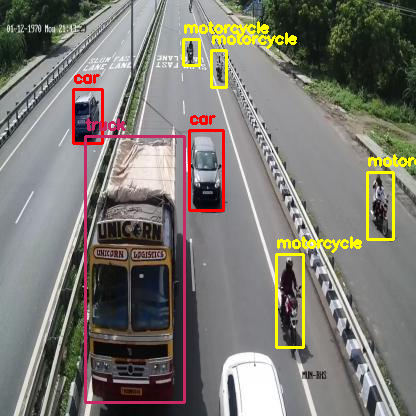

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

colors = [(0,0,0),(0,255,0),(0,0,255),(255,255,0),(0,255,255),(255,0,255),(255,0,0),(100,40,200)]
# Load the image
i = 8100
image = cv2.imread(images_data_paths[i])

# Image dimensions
image_height, image_width, _ = image.shape
print(image_height,image_width)

for l in Labels_Data[i]:

  # Center point and size fractions
  coordinates_list = l
  # Convert each substring to a float
  coordinates_float = [float(num) for num in coordinates_list]
  # Calculate the bounding box coordinates
  x1 = int((coordinates_float[1] - (coordinates_float[3] / 2)) * image_width)
  y1 = int((coordinates_float[2] - (coordinates_float[4] / 2)) * image_height)
  x2 = int((coordinates_float[1] + (coordinates_float[3] / 2)) * image_width)
  y2 = int((coordinates_float[2] + (coordinates_float[4] / 2)) * image_height)
  # Draw the bounding box on the image
  cv2.rectangle(image, (x1, y1), (x2, y2), colors[int(coordinates_float[0])], 2)
  text_box_current = Classes[int(coordinates_float[0])]
  cv2.putText(image, text_box_current, (x1, y1 - 7), cv2.FONT_HERSHEY_SIMPLEX,0.5, colors[int(coordinates_float[0])], 2)

# Display the image with the bounding box
cv2_imshow( image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Split the data

In [ ]:
Ground_truth= get_true_label(Labels_Data)

In [ ]:
train_paths,test_paths,train_label,test_label=train_test_split(images_data_paths, Ground_truth, test_size=0.2, random_state=42)

In [ ]:
print(np.array(train_label).shape,'  ',np.array(test_label).shape)

(6574, 7, 7, 13)    (1644, 7, 7, 13)


**This method used to resize all images to have the shape 448x448x3 using their paths**

In [ ]:
import cv2
import numpy as np
def convert_path_img(paths):
  Norm_imges=[]
  for path in paths:
        # Load the image
        image = cv2.imread(path)
        # Convert the image to a NumPy array
        image_array=cv2.resize(image, (448, 448))

        # Normalize the pixel values
        normalized_image = image_array / 255.0
        Norm_imges.append(normalized_image)
  return Norm_imges

# Model

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as tfl

# defining convolutional block

class CBlock(tf.keras.layers.Layer):
  def __init__(self, filters_num, filter_size, strides=1, padding='valid'):
     super(CBlock, self).__init__()
     self.conv = tfl.Conv2D(filters_num,filter_size,strides=strides,padding=padding)
     self.norm = tfl.BatchNormalization()
     self.activ = tfl.LeakyReLU(0.1)

  def call(self, inputs):
    x = self.conv(inputs)
    x = self.norm(x)
    x = self.activ(x)
    return (x)


# defining the Yolo model architecture

class YOLO(tf.keras.Model):
  def __init__(self,**kwargs):
    super(YOLO, self).__init__()
    self.arch = self.build_net()

  def call(self,inputs):
    x = self.arch(inputs)
    return x

  def build_net(self):
    layers = []
    layers.append(CBlock(64,7,strides=2,padding='same'))
    layers.append(tfl.MaxPool2D(pool_size=2, strides=2))
    layers.append(CBlock(192,3,padding='same'))
    layers.append(tfl.MaxPool2D(pool_size=2, strides=2))
    layers.append(CBlock(128,1,padding='same'))
    layers.append(CBlock(256,3,padding='same'))
    layers.append(CBlock(256,1,padding='same'))
    layers.append(CBlock(512,3,padding='same'))
    layers.append(tfl.MaxPool2D(pool_size=2, strides=2))
    for _ in range(4):
      layers.append(CBlock(256,1,padding='same'))
      layers.append(CBlock(512,3,padding='same'))
    layers.append(CBlock(512,1,padding='same'))
    layers.append(CBlock(1024,3,padding='same'))
    layers.append(tfl.MaxPool2D(pool_size=2, strides=2))
    # 2layers repeated 2 times
    layers.append(CBlock(512,1,padding='same'))
    layers.append(CBlock(1024,3,padding='same'))
    layers.append(CBlock(512,1,padding='same'))
    layers.append(CBlock(1024,3,padding='same'))
    layers.append(CBlock(1024,3,padding='same'))
    layers.append(CBlock(1024,3,strides=2,padding='valid'))
    layers.append(CBlock(1024,3,padding='same'))
    layers.append(CBlock(1024,3,padding='same'))
    # fully connected layers
    layers.append(tfl.Flatten())
    layers.append(tfl.Dense(496))
    # layers.append(tfl.Dropout(0.4))
    layers.append(tfl.LeakyReLU(0.1))
    layers.append(tfl.Dense(7*7*(5+8)))
    layers.append(tfl.Reshape((7,7,13)))
    model = tf.keras.Sequential(layers)
    return model

# testing that the model outputs correct shape and print summary
def test():
  model = YOLO()
  # test_image = Image.open(images_data_paths[7])
  # img_np = np.array(test_image).reshape((1,448,448,3))
  # img_np = img_np.astype('float32') / 255.0
  # img_tensor = tf.convert_to_tensor(img_np)
  temp = tf.random.normal([10,448,448,3], 0, 1, tf.float32, seed=1)
  # temp=np.array(temp)
  x = model(temp)
  print(x)
  model.summary()
# test()



# Utils

In [ ]:
import tensorflow as tf

def InterOverUnion(boxes1, boxes2):
    box1_x1 = boxes1[..., 0:1] - boxes1[..., 2:3] / 2
    box1_y1 = boxes1[..., 1:2] - boxes1[..., 3:4] / 2
    box1_x2 = boxes1[..., 0:1] + boxes1[..., 2:3] / 2
    box1_y2 = boxes1[..., 1:2] + boxes1[..., 3:4] / 2
    box2_x1 = boxes2[..., 0:1] - boxes2[..., 2:3] / 2
    box2_y1 = boxes2[..., 1:2] - boxes2[..., 3:4] / 2
    box2_x2 = boxes2[..., 0:1] + boxes2[..., 2:3] / 2
    box2_y2 = boxes2[..., 1:2] + boxes2[..., 3:4] / 2

    # Calculate the coordinates of the intersection rectangle
    x1 = tf.maximum(box1_x1, box2_x1)
    y1 = tf.maximum(box1_y1, box2_y1)
    x2 = tf.minimum(box1_x2, box2_x2)
    y2 = tf.minimum(box1_y2, box2_y2)

    # Calculate the area of intersection rectangle
    intersection_area = tf.maximum(0.0, x2 - x1) * tf.maximum(0.0, y2 - y1)

    # Calculate the area of each bounding box
    area1 = boxes1[..., 2:3] * boxes1[..., 3:4]
    area2 = boxes2[..., 2:3] * boxes2[..., 3:4]

    # Calculate the union area
    union_area = area1 + area2 - intersection_area

    # Calculate IoU
    iou = intersection_area / (union_area + 1e-7)

    return iou

# Loss Function

In [ ]:
import tensorflow as tf
import numpy as np
class LossFunction(tf.keras.losses.Loss):
  def __init__(self, grid=7, boxes=1, classes=8):
    super(LossFunction, self).__init__()
    self.MSE = tf.keras.losses.MeanSquaredError()
    self.grid=grid
    self.boxes=boxes
    self.classes=classes
    self.lambda_noObj=0.5
    self.lambda_coor=5

  def call(self, Y, Y_pred):
        # Y_pred = tf.reshape(Y_pred, (-1, self.grid, self.grid, (self.classes + self.boxes * 5)) )

        iou = InterOverUnion(Y_pred[...,1:5], Y[...,1:5]) #(N, G, G, 13) ...to do this for all dims
        exist_box = tf.expand_dims(Y[..., 0], axis=3)#object in cell?

        ##################################################
        #                 BOX COORDINATE                 #
        ##################################################
        box_pred = exist_box *  Y_pred[...,1:5]
        box_real = exist_box * Y[..., 1:5]
        box_shape=tf.shape(box_pred)
        N=box_shape[0]
        G=box_shape[1]
        # box_pred_np = box_pred.numpy()
        # box_real_np = box_real.numpy()
        # box_pred_np[..., 2:4] = tf.sign(box_pred[..., 2:4]) * tf.sqrt(tf.abs(box_pred[..., 2:4] + 1e-6))#sign as we take the abs value either error
        # box_real_np[..., 2:4] = tf.sqrt(box_real[..., 2:4]) #0->x, 1->y. 2->w, 3->h
        # box_pred =  tf.convert_to_tensor(box_pred_np)
        # box_real =  tf.convert_to_tensor(box_real_np)

        indices = tf.constant([[2], [3]]) #choose the indices  to update
        pred_sub_tensor = tf.gather(box_pred, [2,3], axis=-1) # get [..., 2:4]
        real_sub_tensor = tf.gather(box_real, [2,3], axis=-1)
        # Apply the  operations to the sub-tensor
        pred_sub_tensor = tf.sign(pred_sub_tensor) * tf.sqrt(tf.abs(pred_sub_tensor + 1e-6))
        real_sub_tensor = tf.sqrt(real_sub_tensor )
        # Assign the updated sub-tensor back to the original tensor
        for i in range(N):
          for j in range(G):
            for k in range(G):
              box_pred = tf.tensor_scatter_nd_update(box_pred,[[i, j ,k , 2 ], [i, j ,k , 3 ]], pred_sub_tensor[i, j, k])
              box_real = tf.tensor_scatter_nd_update(box_real,[[i, j ,k , 2 ], [i, j ,k , 3 ]], real_sub_tensor[i, j, k])



        box_shape=tf.shape(box_pred)
        N=box_shape[0]
        G=box_shape[1]
        #(N, G, G, 4)--> (N*G*G, 4) as MSE expect
        box_loss = self.MSE(tf.reshape(box_pred, [N*G*G, 4]), tf.reshape(box_real,[N*G*G, 4] ))
        ##################################################
        #                  OBJECT LOSS                   #
        ##################################################
        #(N*G*G)
        obj_loss = self.MSE(tf.reshape(exist_box * Y_pred[...,0:1], [N*G*G]),
                            tf.reshape(exist_box * Y[...,0:1], [N*G*G]) )
        ##################################################
        #               NO OBJECT LOSS                   #
        ##################################################
        #(N, G, G, 1)--> (N, G*G)
        No_Obj_Loss = self.MSE(tf.reshape((1-exist_box) * Y_pred[...,0:1], [N, G*G]),
                               tf.reshape((1-exist_box) * Y[...,0:1], [N, G*G]) )
        ##################################################
        #                  CLASS LOSS                    #
        ##################################################
        #(N, G, G, 8)--> (N*G*G, 8)
        class_loss = self.MSE(tf.reshape(exist_box * Y_pred[...,5:13], [N*G*G, 8]),
                              tf.reshape(exist_box * Y[...,5:13], [N*G*G, 8]) )

        loss= (
              self.lambda_coor * box_loss #First 2 rows in the paper
              + obj_loss #Third rows in the paper
              + self.lambda_noObj * No_Obj_Loss #Forth rows in the paper
              + class_loss  #Last rows in the paper
              )
        return loss


In [ ]:
# testing that the model outputs correct shape and print summary
# def test():
#   Loss = LossFunction()
#   ip1=tf.random.uniform((50,7,7,13))
#   ip2=tf.random.uniform((50,7,7,13))
#   print( Loss(ip1, ip2) )
# test()

In [ ]:
ip1=tf.random.uniform((50,7,7,13))
ip2=tf.random.uniform((50,7,7,13))
res=InterOverUnion(ip1[...,1:5], ip2[...,1:5])
print(np.array(res))

[[[[5.42272069e-03]
   [0.00000000e+00]
   [3.77018303e-02]
   ...
   [1.99625850e-01]
   [7.81179592e-02]
   [4.01400596e-01]]

  [[2.60698855e-01]
   [0.00000000e+00]
   [1.77367672e-01]
   ...
   [1.08600138e-02]
   [0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [2.41779834e-01]
   [8.08356777e-02]
   ...
   [0.00000000e+00]
   [1.06705576e-01]
   [0.00000000e+00]]

  ...

  [[2.31725633e-01]
   [4.81348962e-01]
   [5.47429956e-02]
   ...
   [7.16784298e-02]
   [1.70818135e-01]
   [3.65053982e-01]]

  [[0.00000000e+00]
   [1.05696293e-02]
   [2.58826055e-02]
   ...
   [0.00000000e+00]
   [1.02230627e-03]
   [0.00000000e+00]]

  [[6.11328185e-02]
   [0.00000000e+00]
   [0.00000000e+00]
   ...
   [1.00267038e-01]
   [0.00000000e+00]
   [0.00000000e+00]]]


 [[[3.41098934e-01]
   [1.30788296e-01]
   [1.88610956e-01]
   ...
   [0.00000000e+00]
   [0.00000000e+00]
   [1.79315537e-01]]

  [[0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   ...
   [0.00000000e+00]
 

In [ ]:
print(ip1[0][0][1][5:])

tf.Tensor(
[0.7095525  0.21971154 0.97704375 0.67052054 0.9499165  0.91403246
 0.21662378 0.888173  ], shape=(8,), dtype=float32)


In [ ]:
print(ip1[0][0][1][5:][0])

tf.Tensor(0.7095525, shape=(), dtype=float32)


In [ ]:
tf.math.argmax(ip1[0][0][1][5:])

<tf.Tensor: shape=(), dtype=int64, numpy=2>

In [ ]:
print( tf.math.abs(res[0][4][6]))
elem=tf.constant(res[0][4][6])
if elem >0.42:
    print("ddd")


tf.Tensor([0.36505398], shape=(1,), dtype=float32)


#MAP Metric

**Trapzoid Area**

In [ ]:
def trapz(x, y):
    trapezoids=0
    for i in range(1,len(x)):
      trapezoids+= (y[i-1]+y[i])*(x[i]-x[i-1])/2
    return trapezoids

**Average precision for each class**

In [ ]:
def compute_average_precision(precision, recall):
    # Add endpoints for the precision and recall curves
    recall=np.insert(recall,0, 0.0)
    precision=np.insert(precision,0, precision[0])
    precision=np.append(precision,0.0)
    recall=np.append(recall,recall[len(recall)-1])

    my_dict ={} # this dictionary to calculate the maximum value for repeated recalls
    # my_dict.update({0.0: 0.0})
    # Compute the precision values at different recall levels
    for i in range(len(precision)):
      if(recall[i] in my_dict):
          if(my_dict[recall[i]]<precision[i]):
            my_dict[recall[i]]=precision[i]
      else:
        my_dict.update({recall[i]: precision[i]})
    for i in range(len(precision)):
        precision[i]=my_dict[recall[i]]

    # Calculate the area under the precision-recall curve
    ap = trapz(recall,precision)

    return ap

In [ ]:
import tensorflow as tf

def IOU(boxes1, boxes2):
    box1_x1 = boxes1[1:2]
    box1_y1 = boxes1[0:1]
    box1_x2 = boxes1[3:4]
    box1_y2 = boxes1[2:3]
    box2_x1 = boxes2[1:2]
    box2_y1 = boxes2[0:1]
    box2_x2 = boxes2[3:4]
    box2_y2 = boxes2[2:3]

    # Calculate the coordinates of the intersection rectangle
    x1 = tf.maximum(box1_x1, box2_x1)
    y1 = tf.maximum(box1_y1, box2_y1)
    x2 = tf.minimum(box1_x2, box2_x2)
    y2 = tf.minimum(box1_y2, box2_y2)

    # Calculate the area of intersection rectangle
    intersection_area = tf.maximum(0.0, x2 - x1) * tf.maximum(0.0, y2 - y1)
    # print(intersection_area)
    # Calculate the area of each bounding box
    area1 = (box1_x2-box1_x1)*(box1_y2-box1_y1)
    area2 = (box2_x2-box2_x1)*(box2_y2-box2_y1)

    # Calculate the union area
    union_area = area1 + area2 - intersection_area
    # Calculate IoU
    iou = intersection_area / (union_area + 1e-7)

    return iou

**Mean Average precision for 8 classes**

In [ ]:
def Calculate_MAP(y,y_pred):
    AP_Array=[]

    for Class in range(8):
        Predicted=[]
        GT_boxes=[]
        TP=0
        FP=0
        GT_number=0
        Arr_TP_FP=[]

        for box in range(len(y)):
          for item in y[box]:
             if item[4] == Class:
               Predicted.append([box]+item)
        for box in range(len(y_pred)):
          for item in y_pred[box]:
             if item[4] == Class:
               GT_boxes.append([box]+item)

        GT_dict={}
        GT_number=len(GT_boxes)
        if GT_number ==0 or len(Predicted) ==0:
          AP_Array.append(0)
          continue;
        for box in GT_boxes:
            if(box[0] in GT_dict):
               GT_dict[box[0]]=GT_dict[box[0]]+1
            else:
               GT_dict[box[0]]=1
        for key in GT_dict:
            GT_dict[key]=np.zeros(GT_dict[key]).tolist()
        # print(GT_dict)
        # Sort the array based on the second element of each subarray that represent probability
        Predicted = sorted(Predicted, key=lambda x: x[6], reverse=True)
        for pred in Predicted:
            gt_img=[]
            for GT in GT_boxes:
                if(GT[0]==pred[0]):
                   gt_img.append(GT)
            prevIOU=0
            indxIOU=0
            for indx,GT in enumerate(gt_img):
                iou =IOU(np.array(GT[1:5]),np.array(pred[1:5]))
                if iou > prevIOU:
                    prevIOU=iou
                    indxIOU=indx
            if(prevIOU> 0.5):
                if(GT_dict[pred[0]][indxIOU]==0):
                    TP+=1
                    Arr_TP_FP.append([TP,FP])
                    GT_dict[pred[0]][indxIOU]=1
                else:
                    FP +=1
                    Arr_TP_FP.append([TP,FP])
            else:
                FP +=1
                Arr_TP_FP.append([TP,FP])

        Precision,recall =cal_prec_recall(np.array(Arr_TP_FP),GT_number)
        AP_Array.append(compute_average_precision(Precision,recall))

    return np.sum(np.array(AP_Array))/8,AP_Array

In [ ]:
def cal_prec_recall(Array_elem,GT_Count):
  Precision=(Array_elem).T[0]/(Array_elem.T[0]+Array_elem.T[1]+1e-5)
  recall =Array_elem.T[0]/(GT_Count+1e-5)
  return Precision,recall

# Model training

**split whole train data to chuncks to avoid crashing in memory**

In [ ]:
image_chunks = np.array_split(train_paths, 20)
label_chunks = np.array_split(train_label, 20)
print(np.array(image_chunks[9]).shape)
print(np.array(label_chunks).shape)

(329,)
(20,)


<ipython-input-41-e32fa2ed61af>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(label_chunks).shape)


**Main iteration of the model on training data**

In [ ]:
import gc
from matplotlib import pyplot as plt


num_iterations = 10
model = YOLO()
loss_fun = LossFunction()
# metric = tf.keras.metrics.MeanIoU(num_classes=8)
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss=loss_fun, optimizer=opt)
model.build(input_shape=(None, 448, 448, 3))
model.load_weights('/content/drive/MyDrive/modelHmada.h5', skip_mismatch=False, by_name=False, options=None)
X_test = tf.convert_to_tensor(np.array(convert_path_img(test_paths[0:400])))
Y_test = tf.convert_to_tensor(np.array(test_label[0:400]))
losses = []
val_losses = []
prevLos=0.0216
for iteration in range(num_iterations):
  loss=[]
  print("iteration number " + str(iteration + 1))
  for epoch in range(20):
    x = tf.convert_to_tensor(np.array(convert_path_img(image_chunks[epoch])))
    y = tf.convert_to_tensor(np.array(label_chunks[epoch]))

    history = model.fit(x , y, epochs=1, batch_size=8,validation_data=(X_test, Y_test))
    loss.extend(history.history['loss'])
    del x
    del y
    gc.collect()
    tf.keras.backend.clear_session()
  losses.append(sum(loss)/len(loss))
  val_losses.append(history.history['val_loss'])
  if(history.history['val_loss'][0]<prevLos):
      print(history.history['val_loss'][0],'   ii')
      model.save_weights('/content/drive/MyDrive/modelHmada.h5', overwrite=True, save_format=None, options=None)
      prevLos=history.history['val_loss'][0]
plt.plot(losses,label='train loss')
plt.plot(val_losses,label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

iteration number 1
41/41 [==============================] - 31s 720ms/step - loss: 0.0082 - val_loss: 0.0197
0.019677912816405296    ii
iteration number 2
41/41 [==============================] - 31s 709ms/step - loss: 0.0089 - val_loss: 0.0196
0.019604260101914406    ii
iteration number 3
41/41 [==============================] - 26s 590ms/step - loss: 0.0092 - val_loss: 0.0216
iteration number 4
42/42 [==============================] - 31s 709ms/step - loss: 0.0084 - val_loss: 0.0209


In [ ]:
model.save_weights('/content/drive/MyDrive/modelHmada.h5', overwrite=True, save_format=None, options=None)

In [ ]:

# plt.plot(losses,label='train loss')
plt.plot(val_losses,label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
# plt.plot(losses,label='train loss')
plt.plot(losses,label='train loss')
# plt.plot(val_losses,label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

#Evaluation

In [ ]:
model = YOLO()
loss_fun = LossFunction()
# metric=CustomMetric()
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss=loss_fun, optimizer=opt)
model.build(input_shape=(None, 448, 448, 3))
model.load_weights('/content/drive/MyDrive/newesthabd.h5', skip_mismatch=False, by_name=False, options=None)

Total_loss=model.predict( tf.convert_to_tensor(np.array(convert_path_img(test_paths[0:137]))))
for i in range(1,12):
    prediction_1 = model.predict( tf.convert_to_tensor(np.array(convert_path_img(test_paths[i*137:(i+1)*137]))))
    Total_loss=np.concatenate((Total_loss,prediction_1))
print(Total_loss.shape)

5/5 [==============================] - 1s 273ms/step
(1644, 7, 7, 13)


In [ ]:
print(Total_loss.shape)

(1644, 7, 7, 13)


**non max suppression**

In [ ]:
# non max suppression
def get_final_boxes(predictions):
  output = []
  for c in range(8) :
    boxes = []
    scores = []
    for row in range(7):
      for col in range(7):
        box_coords = predictions[0, row, col, 0:5]
        class_num = tf.math.argmax(predictions[0, row, col, 5:13])
        if class_num == c and box_coords[0] >= .6 :
          x = ((row + box_coords[1])/7)
          y = ((col + box_coords[2])/7)
          x1 = (x - (box_coords[3] / 14))
          y1 = (y - (box_coords[4] / 14))
          x2 = (x + (box_coords[3] / 14))
          y2 = (y + (box_coords[4] / 14))
          boxes.append([y1,x1,y2,x2])
          scores.append(box_coords[0])
    if len(boxes) != 0 :
      indices = tf.image.non_max_suppression(boxes,scores,max_output_size = 20,iou_threshold=0.5,score_threshold=0.1)
      for i in indices:
        boxes[i].append(c)
        boxes[i].append(scores[i])
        output.append(boxes[i])
  return output
# print(test_label[10:11])
print(get_final_boxes(test_label[10:11]))

[[0.5432689999999999, 0.596154, 0.9807689999999999, 0.783654, 3, 1.0], [0.274038, 0.543269, 0.336538, 0.567307, 4, 1.0], [0.1538465, 0.12019200000000001, 0.2596155, 0.1875, 7, 1.0]]


**Path All predicted images to nonmax suppression before calculating mAP**

In [ ]:
Final_test =[]
for i in range(len(Total_loss)):
    Final_test.append(get_final_boxes(Total_loss[i:i+1]))


**Path All test images to nonmax suppression before calculating mAP**

In [ ]:
Final_Label =[]
for i in range(len(test_label)):
    Final_Label.append(get_final_boxes(test_label[i:i+1]))


**MAP and losss for validation dataset**

In [ ]:
print('MAP value for whole valid 400 image: ',Calculate_MAP(Final_Label[0:400],Final_test[0:400]))

MAP value for whole valid 400 image:  (0.28761237231902775, [0.1355428263665004, 0.19258966354506965, 0.3223369418696137, 0.260908854906179, 0.15766214517015362, 0.38033297685421025, 0.5933304572335834, 0.25819511260691197])


In [ ]:
print('loss function value for whole valid 400 image: ',loss_fun(test_label[0:400],Total_loss[0:400]))

loss function value for whole valid 400 image:  tf.Tensor(0.019116916333746316, shape=(), dtype=float64)


**MAP and losss for whole test dataset**

In [ ]:
MAP,Array_AP=Calculate_MAP(Final_Label,Final_test)
print('Average precision of auto: ',Array_AP[0])
print('Average precision of bus: ',Array_AP[1])
print('Average precision of car: ',Array_AP[2])
print('Average precision of lcv: ',Array_AP[3])
print('Average precision of motorcycle: ',Array_AP[4])
print('Average precision of multiaxle: ',Array_AP[5])
print('Average precision of tractor: ',Array_AP[6])
print('Average precision of truck: ',Array_AP[7])
print('Total MAP of whole test of auto: ',MAP)

Average precision of auto:  0.19738260735383462
Average precision of bus:  0.17049031981534551
Average precision of car:  0.3349727677534635
Average precision of lcv:  0.20184482746609395
Average precision of motorcycle:  0.16421925662385073
Average precision of multiaxle:  0.3088805316632412
Average precision of tractor:  0.42181960028647897
Average precision of truck:  0.2488414894413193
Total MAP of whole test of auto:  0.25605642505045345


In [ ]:
print('loss function value for whole test images: ',loss_fun(test_label,Total_loss))

loss function value for whole test images:  tf.Tensor(0.01866482470366899, shape=(), dtype=float64)


**Visualising some predicted images**

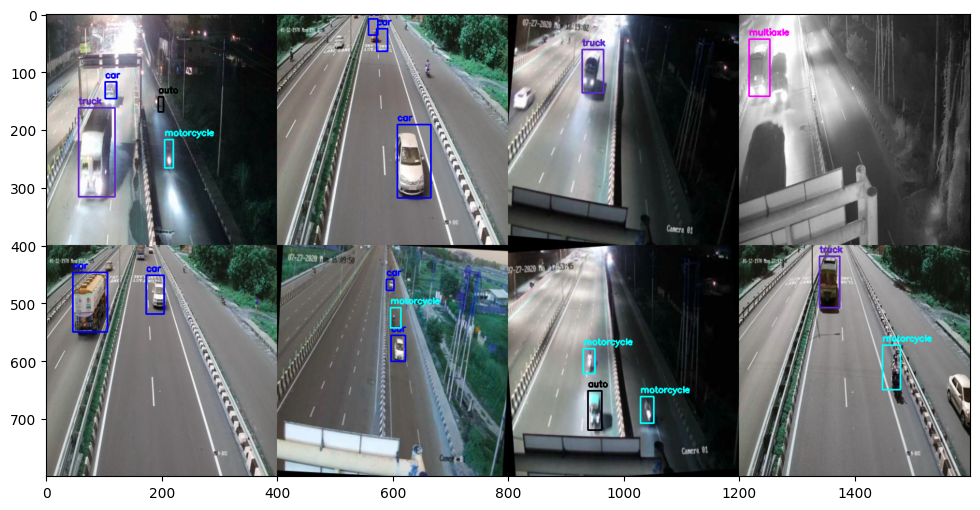

In [ ]:
import cv2

colors = [(0,0,0),(0,255,0),(0,0,255),(255,255,0),(0,255,255),(255,0,255),(255,0,0),(100,40,200)]

# Create a blank canvas to place the images
canvas = np.zeros((800, 1600, 3), dtype=np.uint8)

# Image dimensions
for i in range(8):
    image = cv2.imread(test_paths[i+50])
    image = cv2.resize(image, (400, 400))
    image_height, image_width, _ = image.shape
    box_coords = get_final_boxes(Total_loss[i+50:i+1+50])
    for box in box_coords :
      # Calculate the bounding box coordinates
      x1 = int(box[1] * image_width)
      y1 = int(box[0] * image_height)
      x2 = int(box[3] * image_width)
      y2 = int(box[2] * image_height)
      # Draw the bounding box on the image
      cv2.rectangle(image, (x1, y1), (x2, y2), colors[box[4]], 2)
      text_box_current = Classes[box[4]]
      cv2.putText(image, text_box_current, (x1, y1 - 7), cv2.FONT_HERSHEY_SIMPLEX,0.5, colors[box[4]], 2)
    if(i<4):
      canvas[0:400, (i)*400:(i+1)*400] = image
    else:
      canvas[400:800, (i-4)*400:(i-3)*400] = image
# Display the image with the bounding box
plt.figure(figsize=(12, 6))
plt.imshow( canvas)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

**Visualize the Ground Truth images**

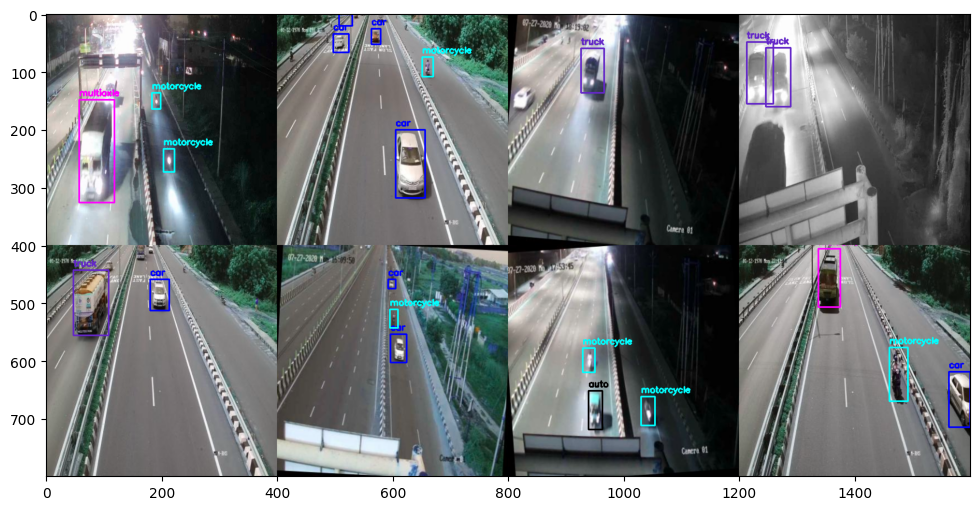

In [ ]:
import cv2

colors = [(0,0,0),(0,255,0),(0,0,255),(255,255,0),(0,255,255),(255,0,255),(255,0,0),(100,40,200)]

# Create a blank canvas to place the images
canvas = np.zeros((800, 1600, 3), dtype=np.uint8)

# Image dimensions
for i in range(8):
    image = cv2.imread(test_paths[i+50])
    image = cv2.resize(image, (400, 400))
    image_height, image_width, _ = image.shape
    box_coords = get_final_boxes(test_label[i+50:i+1+50])
    for box in box_coords :
      # Calculate the bounding box coordinates
      x1 = int(box[1] * image_width)
      y1 = int(box[0] * image_height)
      x2 = int(box[3] * image_width)
      y2 = int(box[2] * image_height)
      # Draw the bounding box on the image
      cv2.rectangle(image, (x1, y1), (x2, y2), colors[box[4]], 2)
      text_box_current = Classes[box[4]]
      cv2.putText(image, text_box_current, (x1, y1 - 7), cv2.FONT_HERSHEY_SIMPLEX,0.5, colors[box[4]], 2)
    if(i<4):
      canvas[0:400, (i)*400:(i+1)*400] = image
    else:
      canvas[400:800, (i-4)*400:(i-3)*400] = image
# Display the image with the bounding box
plt.figure(figsize=(12, 6))
plt.imshow( canvas)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# References

* dataset link

https://www.kaggle.com/datasets/sakshamjn/vehicle-detection-8-classes-object-detection


* others

https://www.youtube.com/watch?v=VAFmP4L2z_U&list=PLlH6o4fAIji76vBRv54WPQr0MHgEiipL7&index=6

https://www.youtube.com/watch?v=zgbPj4lSc58

**MAP Based on this idea in githup link and youtube link**

https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/Pytorch/object_detection/YOLO/utils.py
https://www.youtube.com/watch?v=FppOzcDvaDI&t=496s